In [13]:
import numpy as np
from matplotlib import pyplot as plt

from Alcohol.caching import load
from Processing import TimeSeries, PriceQuantity as PQ


In [6]:
ts = load(dir_path="../Alcohol/Caches", identifier="0")

In [7]:
longest_ts = ts.get_nth_longest(0)
top_n = [ts.get_nth_longest(i) for i in range(20)]
ts.price.shape

(145, 13281)

In [8]:
for element in top_n:
    print(element.quantity.astype(int))

[1466 1609 1614 1617 2082 2158 1633 1725 2094 2140 1575 1889    3 1928
 1188 1928 1765 1006 1608 1666 1547 2811 1299 2248 1644 1516 1220 1533
 1276 1729 1532 1218 1467 2083 1399 2606 1477 1727 1289 1341 1183 1665
 1906 1311 1721 1666 1994 2406 1399 1634 1501 1244 1683 1501 1558 1261
 1690 1610 1716 2367 1470 1246 1239 1047 1540 1714 1151 1310 1321 1351
 1424 2149 1515 1353 1434 1121 1669 1976 1004 1694 1151 1757 1938 1774
 1750 1378 1411 1792 1668 1091 1322 1394 1314 1621 1436 1888 1263 1176
 1794 1719 1456 1521 1373 1404  971  467 1219 2511 1400 1518 1272 1685
 1185 1406 1330 1016 1244 1619 1686 1822 1222 1337  891 1037 1017 1000
  950 1252  885 1222 1187 1562  858  766  925 1067  859 1458  908  672
  995 1179 1380  161]
[1056 1257 1135 1152 1257 1066 1105 1220  820 1363  882 1063  985  859
  924  905  971  892  893  925  753  891  800  932  653  884  789  818
  715  703  896  631  672  670  614  716  650  581  695  727  604  778
  635  507  536  507  503  692  598  575  648  503  541

In [9]:
for element in top_n:
    print("normal: ", np.corrcoef(x=element.price, y=element.quantity)[0, 1])
    print("demeaned: ", np.corrcoef(x=element.price, y=PQ.skip_demean_quantity(element, period=12).quantity)[0, 1])
    shifted = PQ.shift_price(element, 1)
    print("shifted: ", np.corrcoef(x=shifted.price, y=PQ.skip_demean_quantity(shifted, period=12).quantity)[0, 1])
    print("---------")


normal:  -0.44256119743124056
demeaned:  -0.5131827845496236
shifted:  -0.5067484101407141
---------
normal:  -0.9094202830383026
demeaned:  -0.9134435947702108
shifted:  -0.9135005794770751
---------
normal:  -0.46112307181682516
demeaned:  -0.4741831038064321
shifted:  -0.48179789454539934
---------
normal:  -0.1563639909853266
demeaned:  -0.15744276869526885
shifted:  -0.23084427260491056
---------
normal:  -0.4336974762870217
demeaned:  -0.4565519685902301
shifted:  -0.41477791863424396
---------
normal:  -0.07633436103568378
demeaned:  -0.12045158210525023
shifted:  -0.14330104101640675
---------
normal:  0.27611886136562286
demeaned:  0.2798466165363549
shifted:  0.3685254732027206
---------
normal:  -0.7198792049444919
demeaned:  -0.7307372621680601
shifted:  -0.7272949438583178
---------
normal:  -0.4029658923602478
demeaned:  -0.40120665576277625
shifted:  -0.42990627232411316
---------
normal:  -0.08405935627131425
demeaned:  -0.07537682614632854
shifted:  -0.0560161780718408

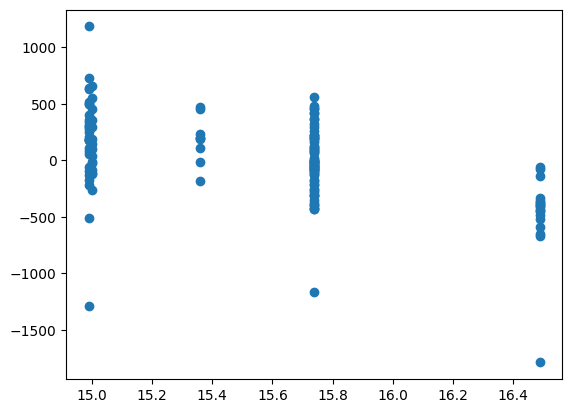

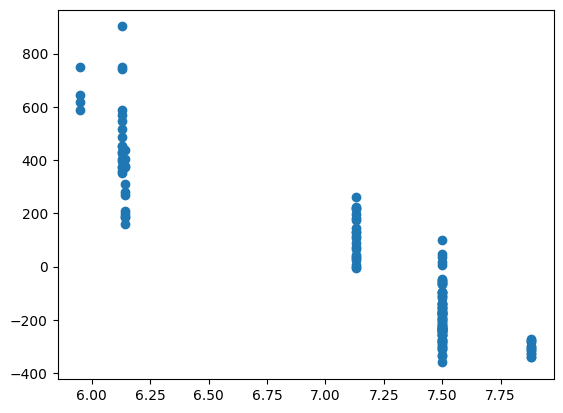

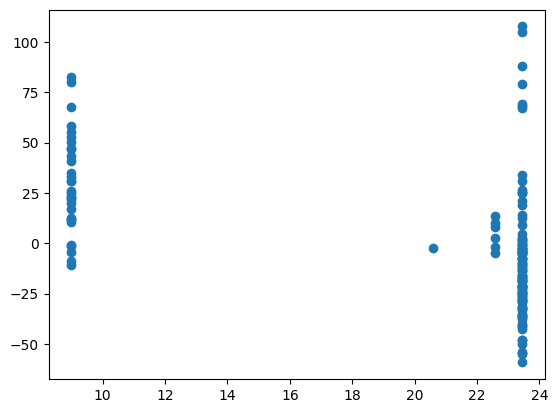

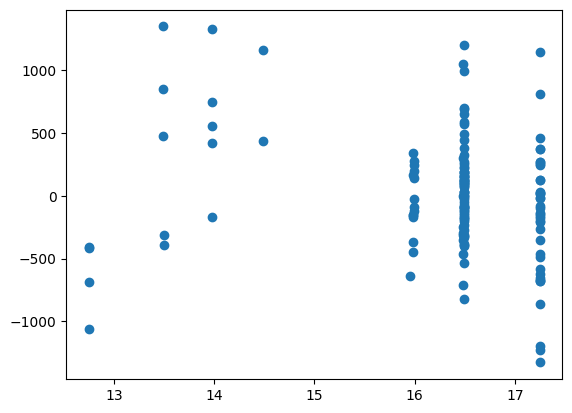

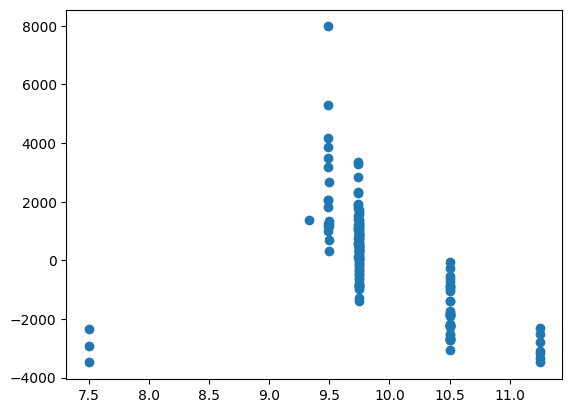

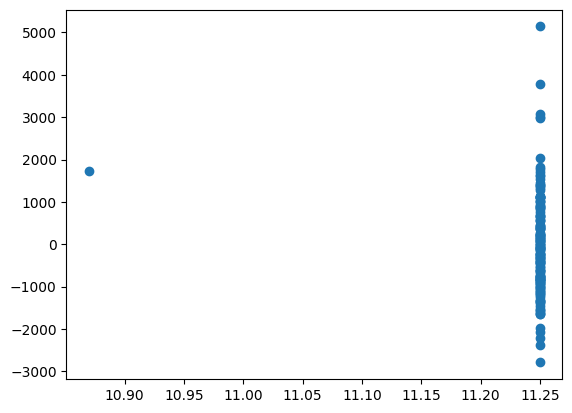

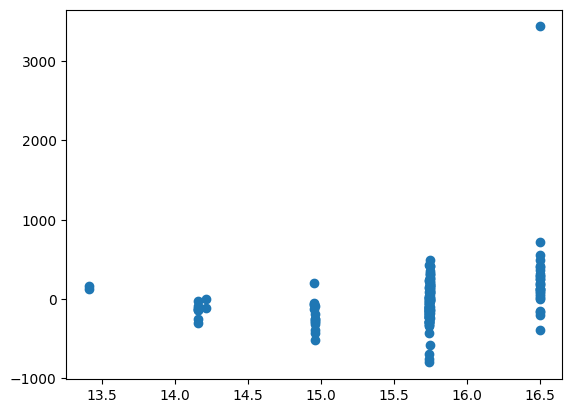

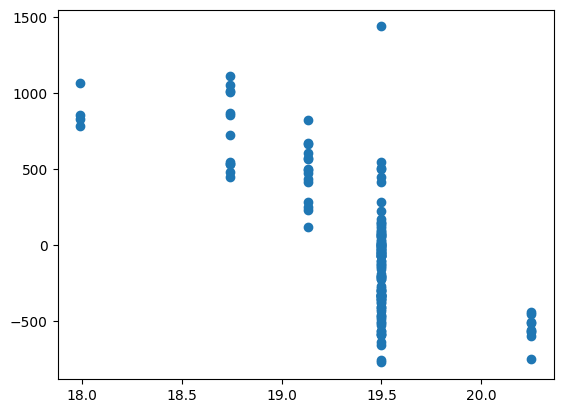

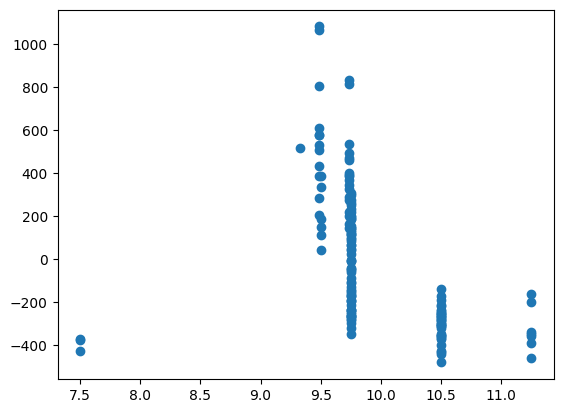

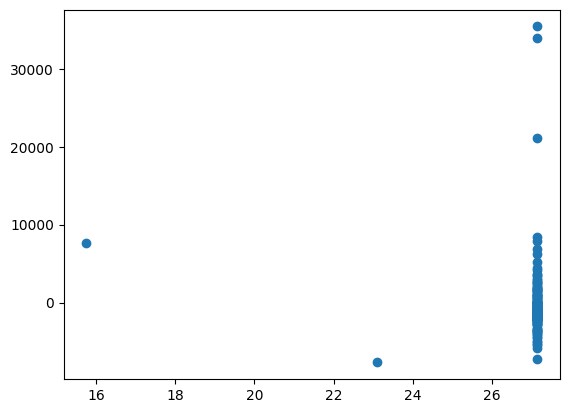

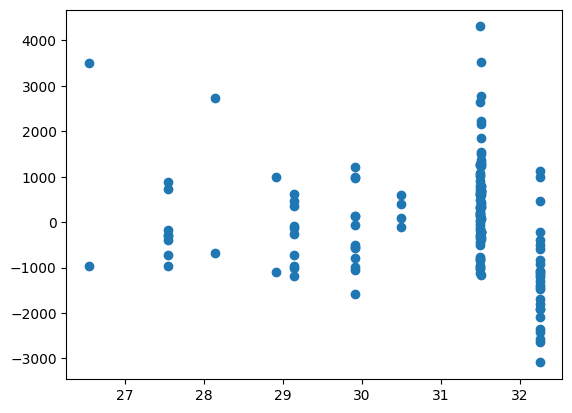

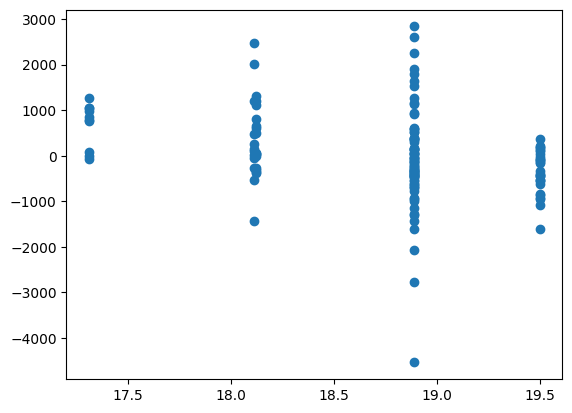

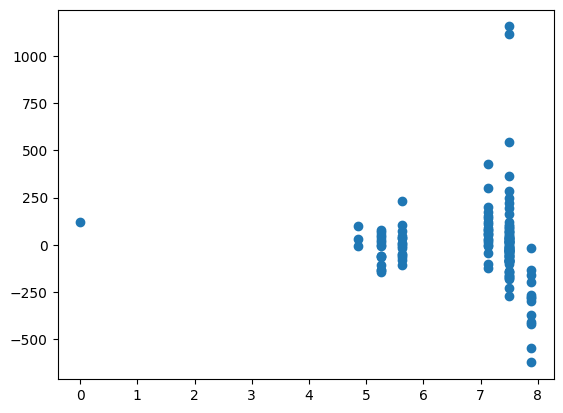

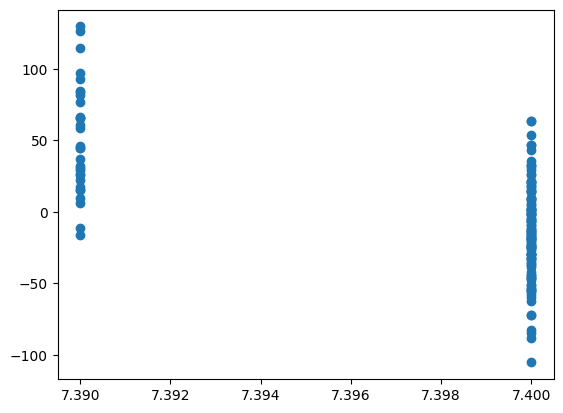

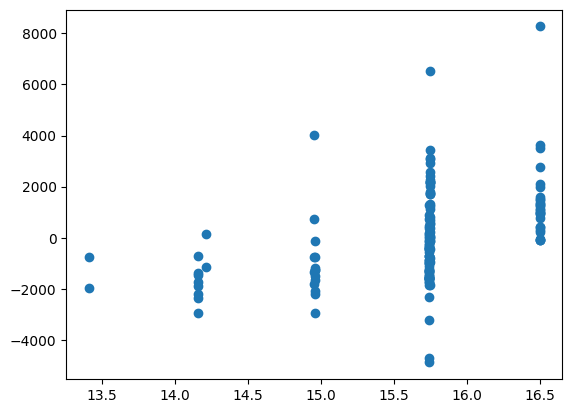

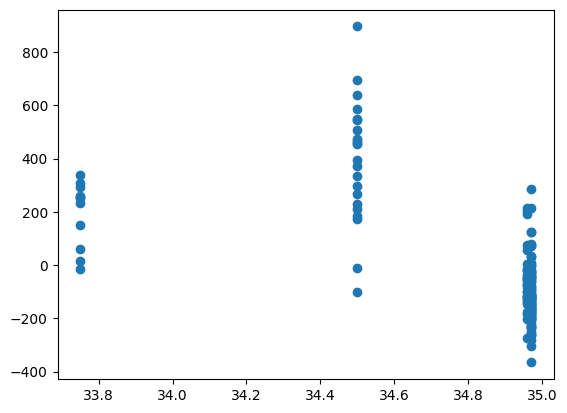

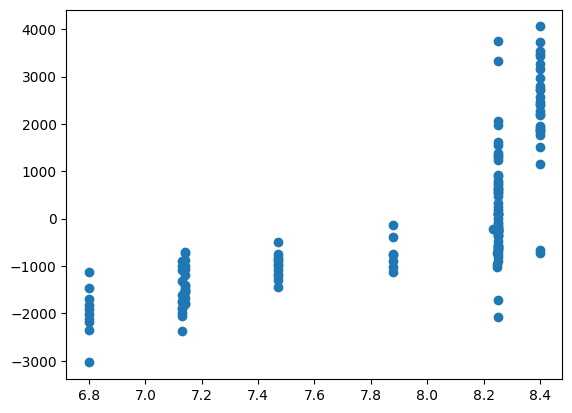

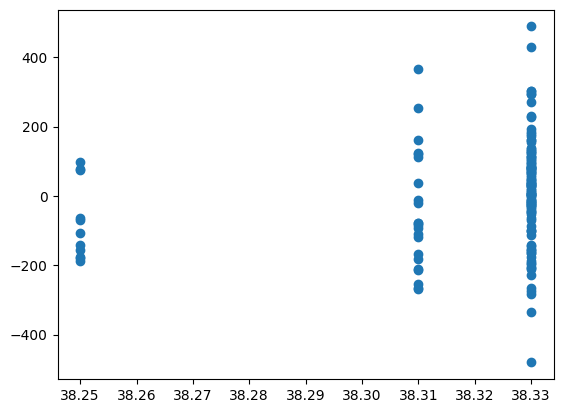

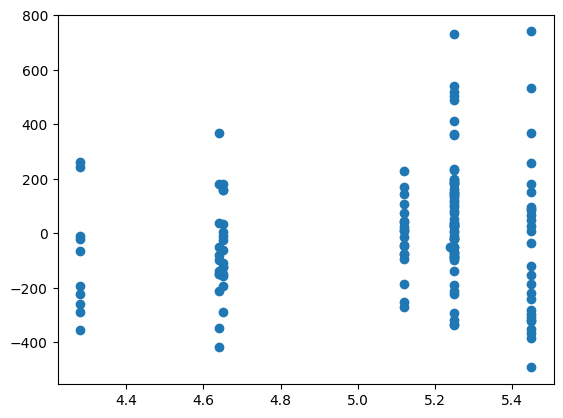

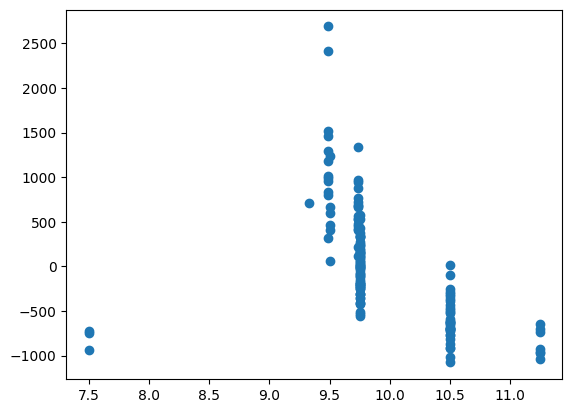

In [10]:
for element in top_n:
    plt.figure()
    demeaned = PQ.skip_demean_quantity(element, period=12)
    plt.scatter(demeaned.price, demeaned.quantity)
plt.show()

0  -0.5131827845496236


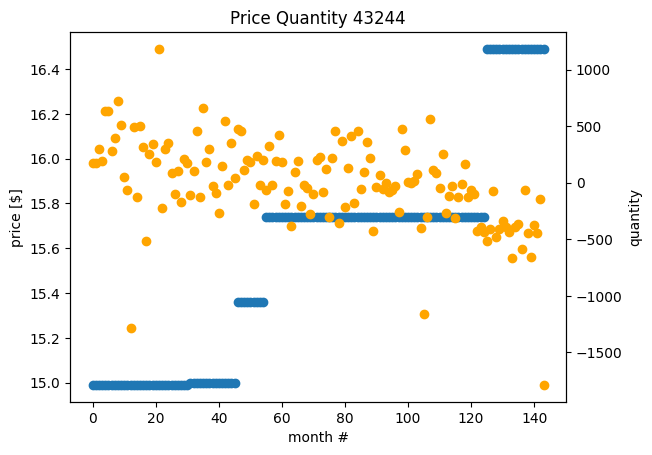

1  -0.9134435947702108


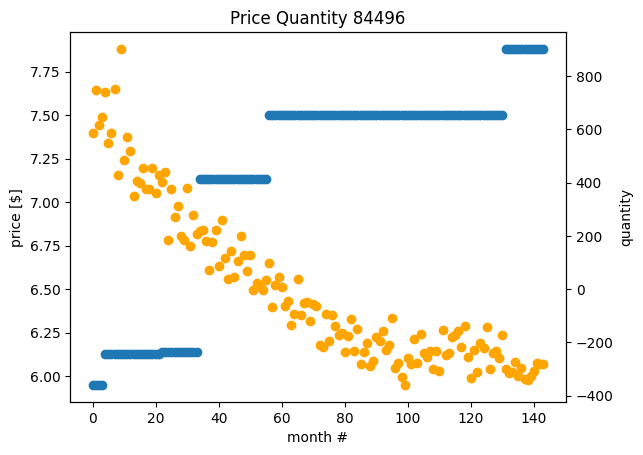

2  -0.4741831038064321


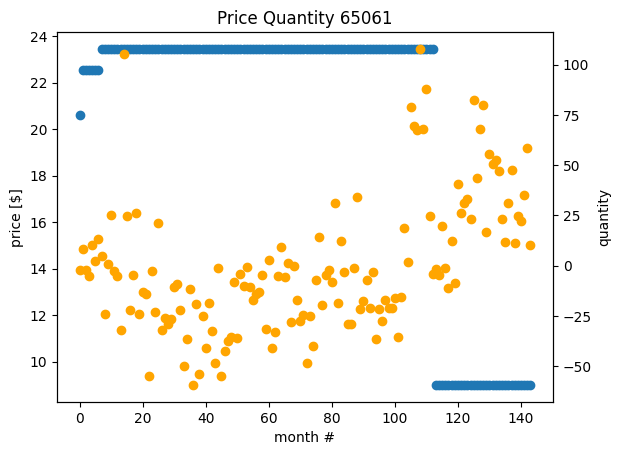

3  -0.15744276869526885


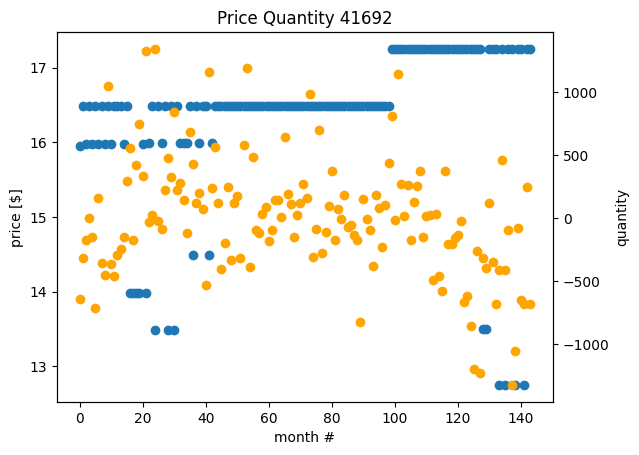

4  -0.4565519685902301


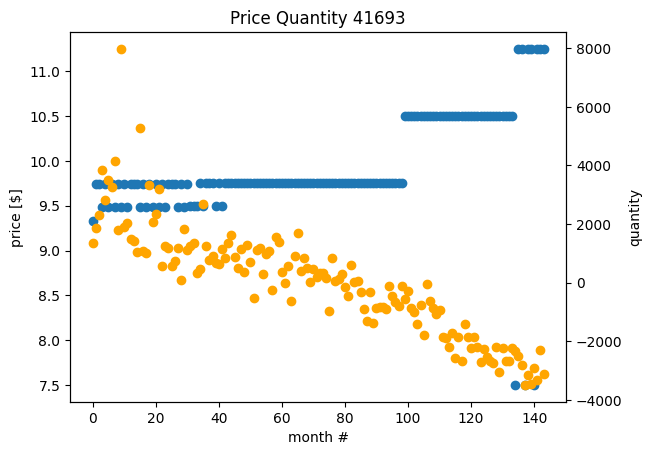

5  -0.12045158210525023


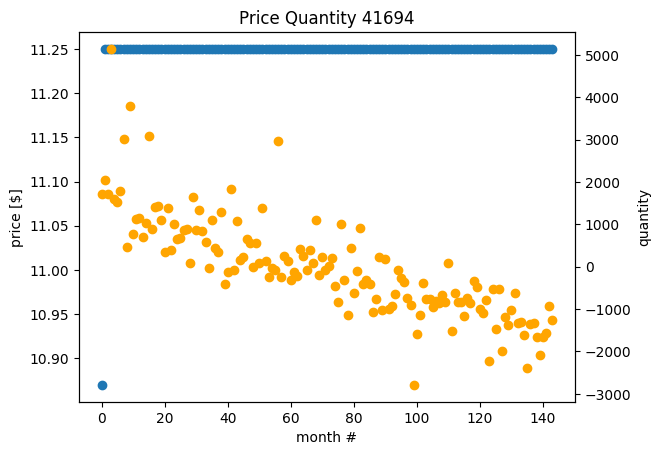

6  0.2798466165363549


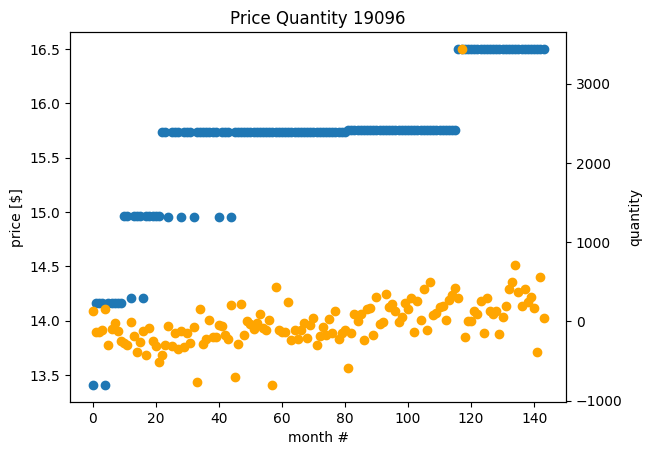

7  -0.7307372621680601


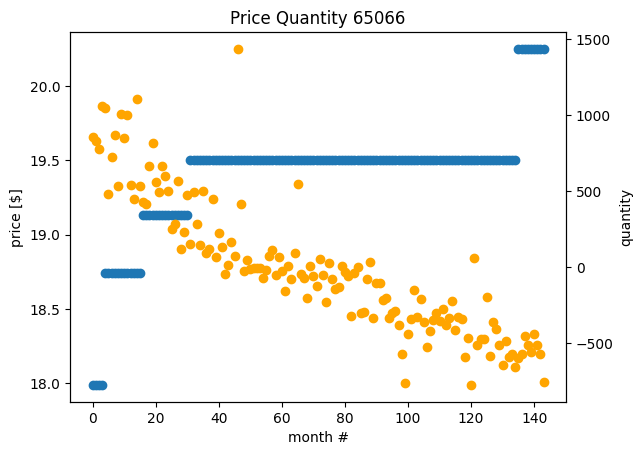

8  -0.40120665576277625


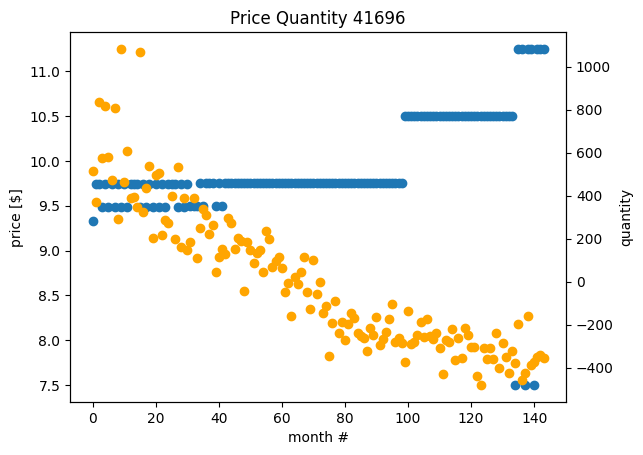

9  -0.07537682614632854


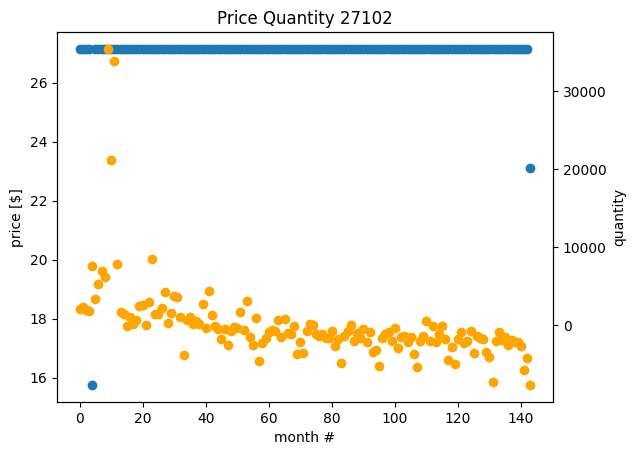

10  -0.12679459330962942


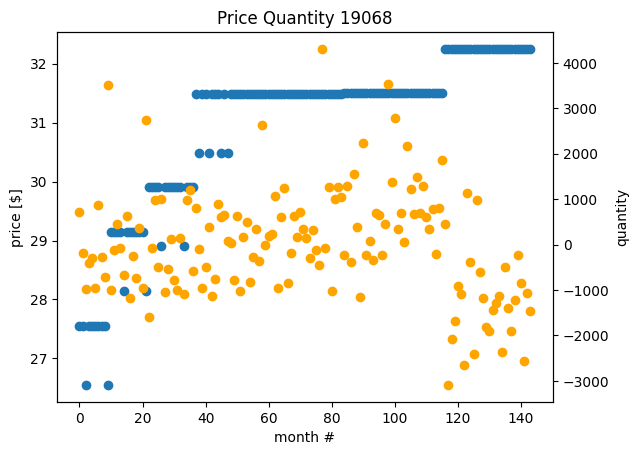

11  -0.303332638271343


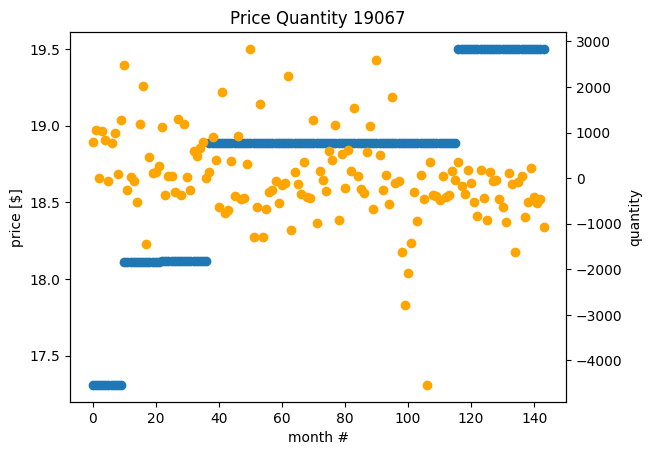

12  -0.08662650363667049


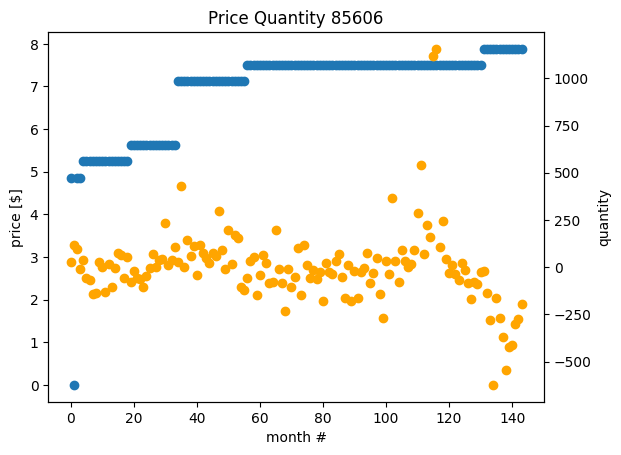

13  -0.6223500006798979


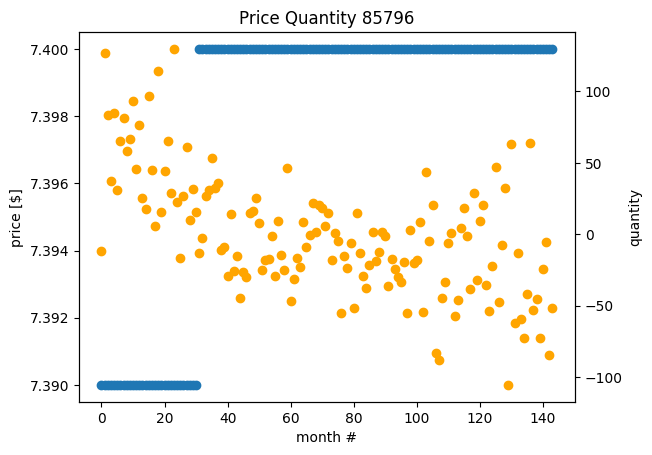

14  0.4275769973704769


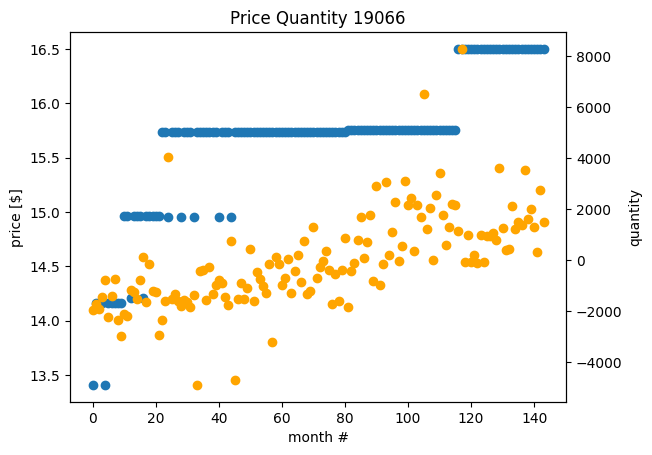

15  -0.5831973658152414


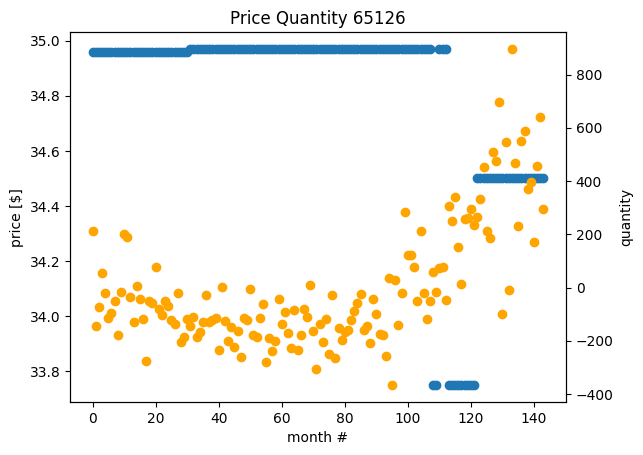

16  0.72761209446056


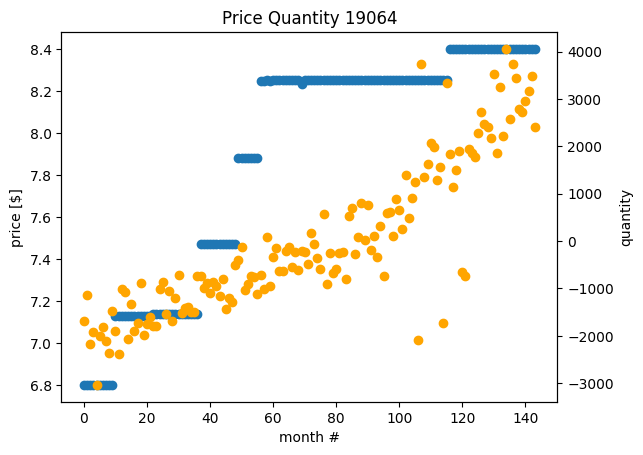

17  0.1792163384229838


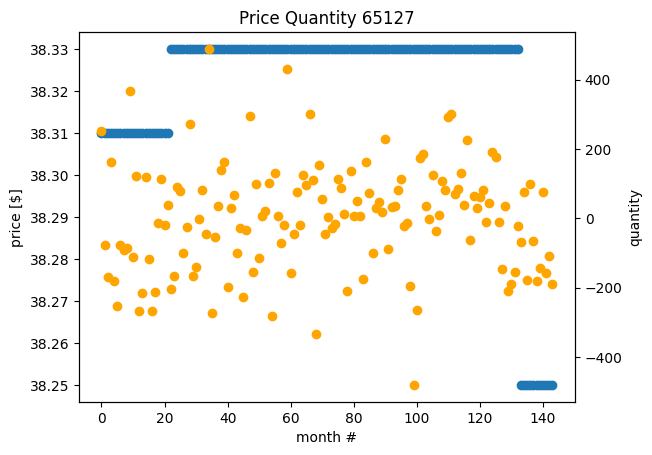

18  0.1520639053162064


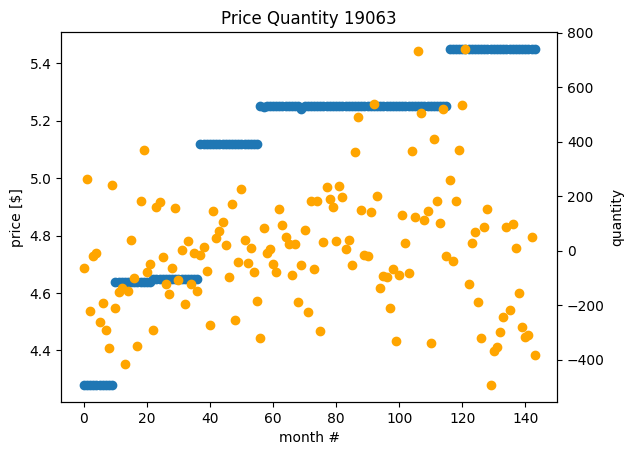

19  -0.448299797979602


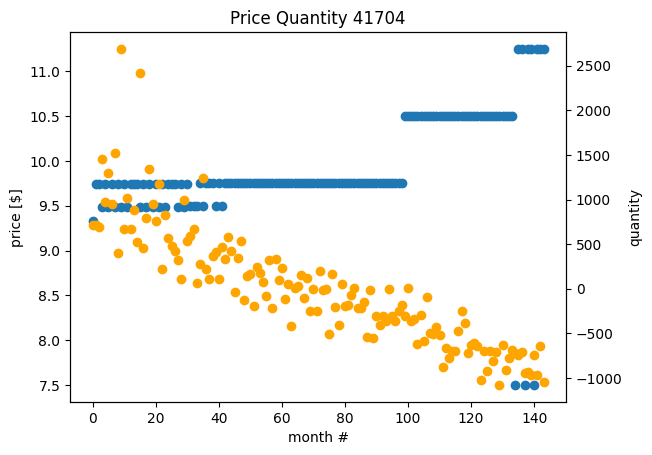

5

In [11]:

                
demean = True
shift = False
for i, pq in enumerate(top_n):
    if demean:
        pq = PQ.skip_demean_quantity(pq, 12)
    if shift:
        pq = PQ.shift_price(pq, -1)
    print(f'{i} ', pq.get_correlation())
    pq.draw_scatter_graph()
    plt.show()
5
        

In [12]:
from Model.linear_model import last_change_slope, last_change_with_time_slope, linear_model_with_time_slope, linear_model_slope, find_change_range

pq = top_n[2]
pq = PQ.bin_price_absolute(pq, 0.25)[-80:]
print(pq.price)
#print(pq.quantity)
print(find_change_range(pq))
(
    last_change_slope(pq, min_count=8),
    last_change_with_time_slope(pq, min_count=15),
    linear_model_slope(pq),
    linear_model_with_time_slope(pq)
 )




[23.25 23.25 23.25 23.25 23.25 23.25 23.25 23.25 23.25 23.25 23.25 23.25
 23.25 23.25 23.25 23.25 23.25 23.25 23.25 23.25 23.25 23.25 23.25 23.25
 23.25 23.25 23.25 23.25 23.25 23.25 23.25 23.25 23.25 23.25 23.25 23.25
 23.25 23.25 23.25 23.25 23.25 23.25 23.25 23.25 23.25 23.25 23.25 23.25
 23.25  9.    9.    9.    9.    9.    9.    9.    9.    9.    9.    9.
  9.    9.    9.    9.    9.    9.    9.    9.    9.    9.    9.    9.
  9.    9.    9.    9.    9.    9.    9.    9.  ]
(49, 49, 30)


(-1.5742690058479532,
 (0.961111111111111, 2.3228070175438598),
 -2.135430742755506,
 (1.173371335504887, 1.1582431814687357))